<a href="https://colab.research.google.com/github/hpamdeoxys/ODI_Crick_Info_Data_Viz/blob/main/ODI_Cricket_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/ODI_cricinfo_country_en.csv')
df.head(15)


,Unnamed: 0,Unnamed: 0.1,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date,HostCountry
0,0,0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",Australia
1,1,1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",United Kingdom
2,2,2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",India
3,3,3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",United Kingdom
4,4,4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",New Zealand
5,5,5,ODI # 6,England,New Zealand,England,7 wickets,Swansea,"Jul 18, 1973",United Kingdom
6,6,6,ODI # 7,England,New Zealand,no result,NaN,Manchester,"Jul 20, 1973",United Kingdom
7,7,7,ODI # 8,England,West Indies,England,1 wicket,Leeds,"Sep 5, 1973",United Kingdom
8,8,8,ODI # 9,England,West Indies,West Indies,8 wickets,The Oval,"Sep 7, 1973",United Kingdom
9,9,9,ODI # 10,New Zealand,Australia,Australia,7 wickets,Dunedin,"Mar 30, 1974",New Zealand


In [4]:
df['date len'] = df['Match Date'].str.len()
df = df[(df['date len']<=12)]
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'date len'])
df['Match Date'] = pd.to_datetime(df['Match Date'], format
='%b %d, %Y')
df.set_index('Match Date', inplace=True)
df.head(15)

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,HostCountry
Match Date,,,,,,,
1971-01-05,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,Australia
1972-08-24,ODI # 2,England,Australia,England,6 wickets,Manchester,United Kingdom
1972-08-26,ODI # 3,England,Australia,Australia,5 wickets,Lord's,India
1972-08-28,ODI # 4,England,Australia,England,2 wickets,Birmingham,United Kingdom
1973-02-11,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,New Zealand
1973-07-18,ODI # 6,England,New Zealand,England,7 wickets,Swansea,United Kingdom
1973-07-20,ODI # 7,England,New Zealand,no result,NaN,Manchester,United Kingdom
1973-09-05,ODI # 8,England,West Indies,England,1 wicket,Leeds,United Kingdom
1973-09-07,ODI # 9,England,West Indies,West Indies,8 wickets,The Oval,United Kingdom


**1. Display the histogram that represents year-wise number of matches 
played by an input country given.**


Enter a Country: India


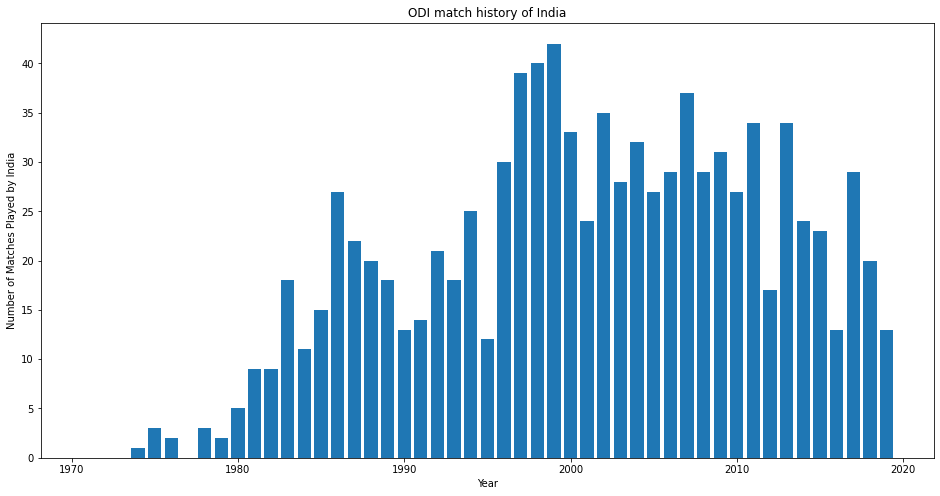

In [5]:
Country = input("Enter a Country: ")
match_played = []
years = df.index.year.unique()
for year in years:
 match_played.append((((df['Team 1']==Country) | (df['Team 2']==Country)) & (df.index.year==year)).sum())
 
plt.figure(figsize=(16,8))
plt.bar(years, match_played)
plt.xlabel('Year')
plt.ylabel(f'Number of Matches Played by {Country}')
plt.title(f'ODI match history of {Country}')
plt.show()

**2. Filter out the dataset based on the year given. (Ex: 2018)**


In [6]:
year = input()
df.loc[year]


2018


,Scorecard,Team 1,Team 2,Winner,Margin,Ground,HostCountry
Match Date,,,,,,,
2018-01-06,ODI # 3946,New Zealand,Pakistan,New Zealand,61 runs,Wellington,New Zealand
2018-01-09,ODI # 3947,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,New Zealand
2018-01-11,ODI # 3948,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,United Arab Emirates
2018-01-13,ODI # 3949,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,New Zealand
2018-01-13,ODI # 3950,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,United Arab Emirates
...,...,...,...,...,...,...,...
2018-11-11,ODI # 4069,Australia,South Africa,South Africa,40 runs,Hobart,Australia
2018-11-11,ODI # 4070,New Zealand,Pakistan,no result,NaN,Dubai (DSC),United Arab Emirates
2018-12-09,ODI # 4071,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,Bangladesh


**Question No. 3 onwards, consider the year 2018 only for experimentation**


In [7]:
df_2018 = df.loc['2018']
df_2018

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,HostCountry
Match Date,,,,,,,
2018-01-06,ODI # 3946,New Zealand,Pakistan,New Zealand,61 runs,Wellington,New Zealand
2018-01-09,ODI # 3947,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,New Zealand
2018-01-11,ODI # 3948,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,United Arab Emirates
2018-01-13,ODI # 3949,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,New Zealand
2018-01-13,ODI # 3950,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,United Arab Emirates
...,...,...,...,...,...,...,...
2018-11-11,ODI # 4069,Australia,South Africa,South Africa,40 runs,Hobart,Australia
2018-11-11,ODI # 4070,New Zealand,Pakistan,no result,NaN,Dubai (DSC),United Arab Emirates
2018-12-09,ODI # 4071,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,Bangladesh


**3. Which country played most ODIs in 2018.**

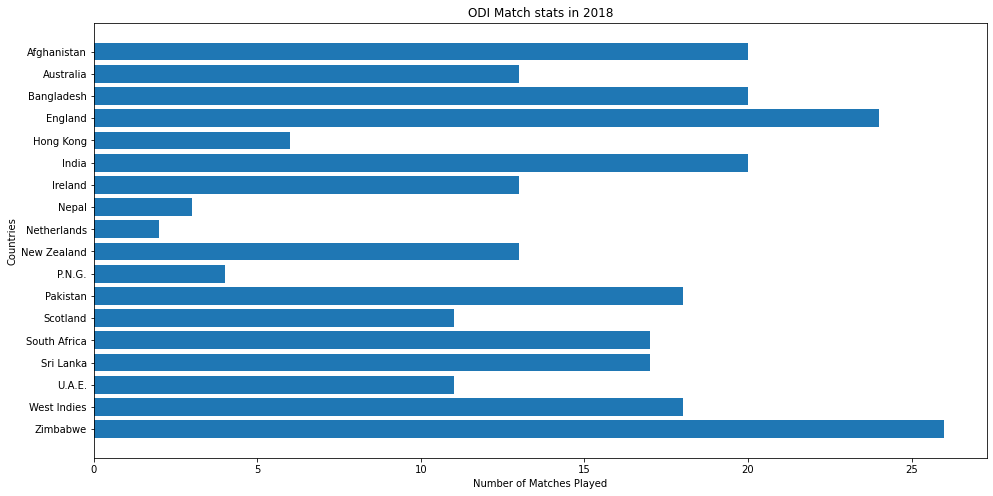

In [8]:
Countries = list(set(df_2018['Team 1']).union(set(df_2018[
'Team 2'])))
Countries.sort(reverse=True)
matches_played = []
for country in Countries:
 matches_played.append(((df_2018['Team 1']==country) | 
(df_2018['Team 2']==country)).sum())
 
plt.figure(figsize=(16,8))
plt.barh(Countries, matches_played)
plt.xlabel('Number of Matches Played')
plt.ylabel('Countries')
plt.title('ODI Match stats in 2018')
plt.show()

**4. Top three countries who won the most ODIs.**

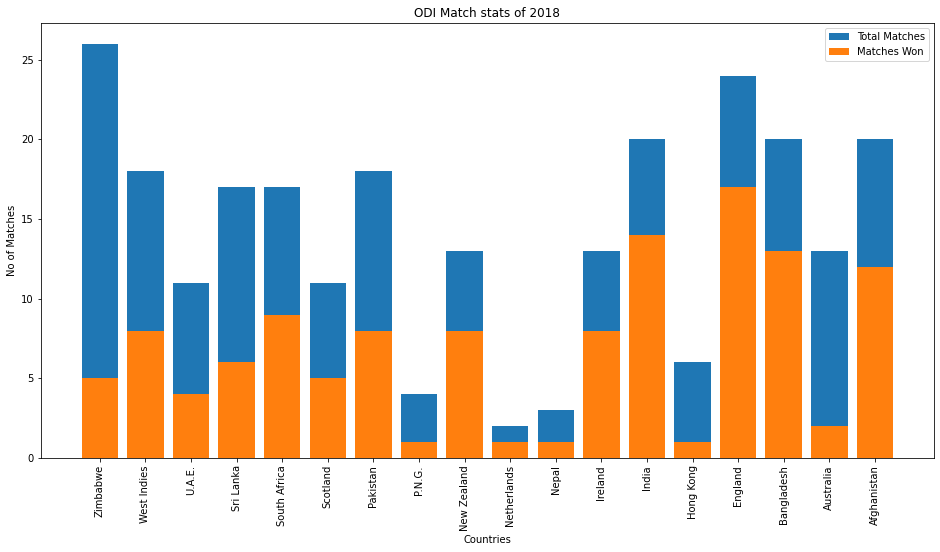

In [9]:
winners = list(df_2018['Winner'].unique())
winners.sort(reverse=True)
winners = winners[2:]
match_won = []
for country in winners:
 match_won.append(list(df_2018['Winner']).count(country
))
plt.figure(figsize=(16,8))
plt.bar(winners,matches_played, label='Total Matches')
plt.bar(winners, match_won, label='Matches Won')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('No of Matches')
plt.title('ODI Match stats of 2018')
plt.legend()
plt.show()

**5. Based on the ground, map the ODIs.**

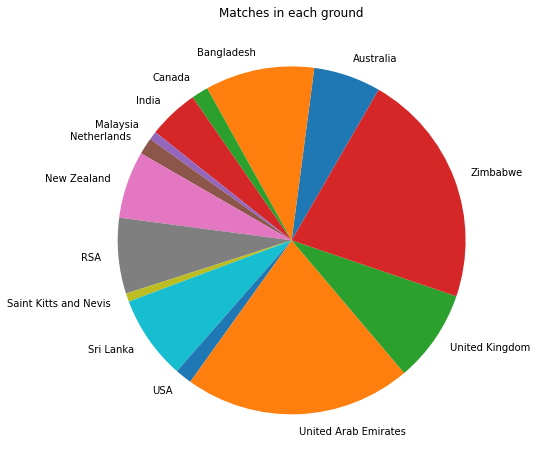

In [11]:
hosts = list(df['HostCountry'].unique())
hosts.sort()
ground = {}
for host in hosts:
 if df_2018[df_2018['HostCountry']==host].shape[0]!=0:ground[host]=df_2018[df_2018['HostCountry']==host].shape[0]
plt.figure(figsize=(16,8))
plt.pie(ground.values(), labels=ground.keys(), startangle=
60)
plt.title('Matches in each ground')
plt.show()

**6. Which country played most matches in their home ground.**

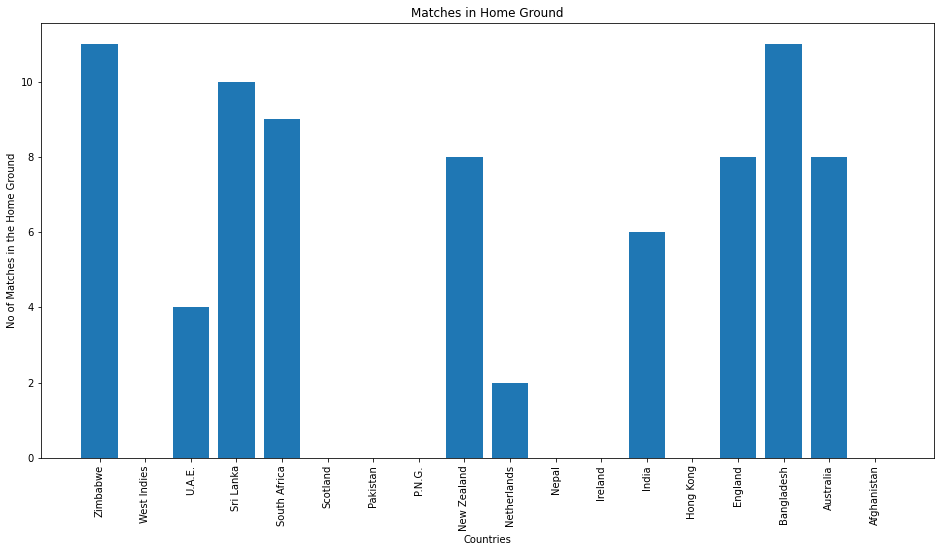

In [15]:
home_ground_matches = {}
df_2018['HostCountry'] = df_2018['HostCountry'].str.replace("RSA","South Africa")
df_2018['HostCountry'] = df_2018['HostCountry'].str.replace("United Arab Emirates","U.A.E.")
df_2018['HostCountry'] = df_2018['HostCountry'].str.replace("United Kingdom","England")
for country in Countries:
 home_ground_matches[country] = (((df_2018['Team 1']==country) | (df_2018['Team 2']==country)) & (df_2018['HostCountry']==country)).sum()
plt.figure(figsize=(16,8))
plt.bar(home_ground_matches.keys(),home_ground_matches.values())
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('No of Matches in the Home Ground')
plt.title('Matches in Home Ground')
plt.show()


**7. How was the performance of India**

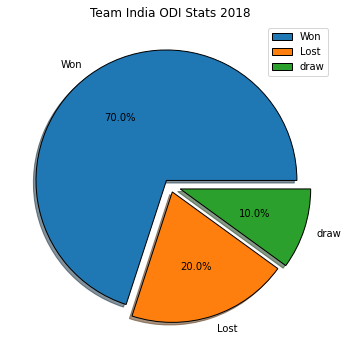

In [20]:
matches_won = (df_2018['Winner']=='India').sum()
matches_lost = (((df_2018['Team 1']=='India') | (df_2018['Team 2']=='India')) & ~(df_2018['Winner']=='tied') & ~(df_2018['Winner']=='India')).sum()
matches_tied = (((df_2018['Team 1']=='India') | (df_2018['Team 2']=='India')) & (df_2018['Winner']=='tied')).sum()
match_stats_India = [matches_won, matches_lost, matches_tied]
labels = ['Won', 'Lost', 'draw']
explode =[0.05,0.05,0.08]
plt.figure(figsize=(12,6))
plt.pie(match_stats_India, labels=labels, wedgeprops={'edgecolor':'black'}, shadow=True, explode=explode, autopct='%1.1f%%')
plt.title('Team India ODI Stats 2018')
plt.legend()
plt.show()

**8. What are the top three countries who won by runs?**

In [21]:
df_2018[['Number', 'margin']] = df_2018['Margin'].str.split(expand=True)
df_2018['Number'] = df_2018['Number'].fillna('0')
df_2018['Number'] = df_2018['Number'].apply(int)
df_2018[(df_2018['margin']=='runs')].nlargest(10, columns=['Number'])

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,HostCountry,Number,margin
Match Date,,,,,,,,,
2018-07-20,ODI # 4020,Zimbabwe,Pakistan,Pakistan,244 runs,Bulawayo,Zimbabwe,244,runs
2018-06-19,ODI # 4011,England,Australia,England,242 runs,Nottingham,England,242,runs
2018-03-12,ODI # 3995,Ireland,U.A.E.,Ireland,226 runs,Harare,Zimbabwe,226,runs
2018-10-29,ODI # 4063,India,West Indies,India,224 runs,Mumbai (BS),India,224,runs
2018-10-23,ODI # 4058,Sri Lanka,England,Sri Lanka,219 runs,Colombo (RPS),Sri Lanka,219,runs
2018-07-13,ODI # 4015,Zimbabwe,Pakistan,Pakistan,201 runs,Bulawayo,Zimbabwe,201,runs
2018-01-13,ODI # 3949,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,New Zealand,183,runs
2018-08-12,ODI # 4031,Sri Lanka,South Africa,Sri Lanka,178 runs,Colombo (RPS),Sri Lanka,178,runs
2018-01-19,ODI # 3959,Bangladesh,Sri Lanka,Bangladesh,163 runs,Dhaka,Bangladesh,163,runs


**9. Month in which most ODIs were played
10. Draw histogram that represents the number of matches played in 
each month of 2018.**

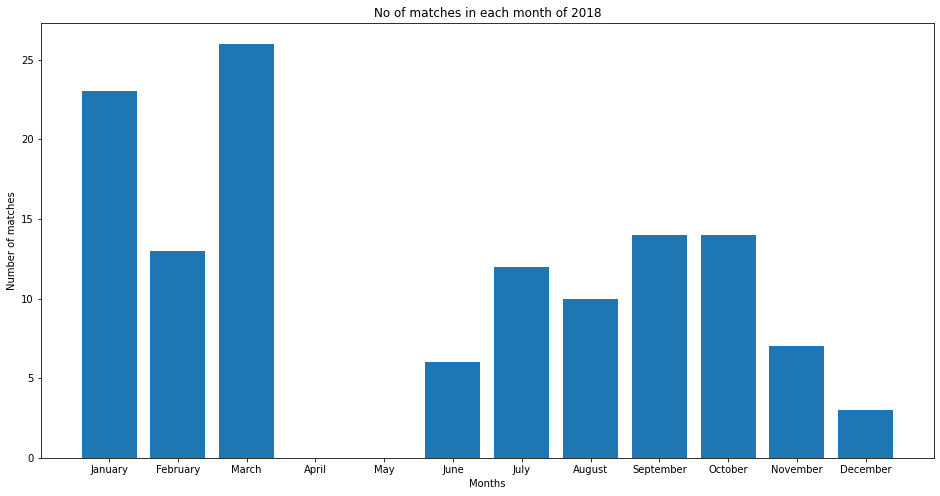

In [22]:
no_of_matches = []
for month in range(1,13):
 no_of_matches.append(df_2018.loc[f'{month}-2018'].shape[0])
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(16,8))
plt.bar(month, no_of_matches)
plt.xlabel('Months')
plt.ylabel('Number of matches')
plt.title('No of matches in each month of 2018')
plt.show()

**11. Did India win mostly by playing first or second innings?**

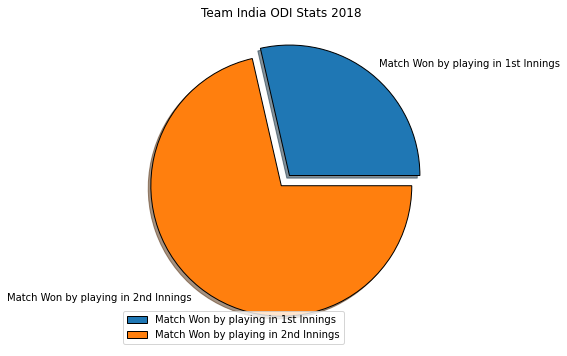

In [23]:
won_by_wickets = ((df_2018['Winner']=='India') & (df_2018['margin']=='wickets')).sum()
won_by_runs = ((df_2018['Winner']=='India') & (df_2018['margin']=='runs')).sum()
match_stats_India = [won_by_runs, won_by_wickets]
labels = ['Match Won by playing in 1st Innings', 'Match Won by playing in 2nd Innings']
explode = [0.1, 0]
plt.figure(figsize=(12,6))
plt.pie(match_stats_India, labels=labels, wedgeprops={'edgecolor':'black'}, shadow=True, explode=explode)
plt.title('Team India ODI Stats 2018')
plt.legend()
plt.show()


**12. Team which had lost most of the matches.**

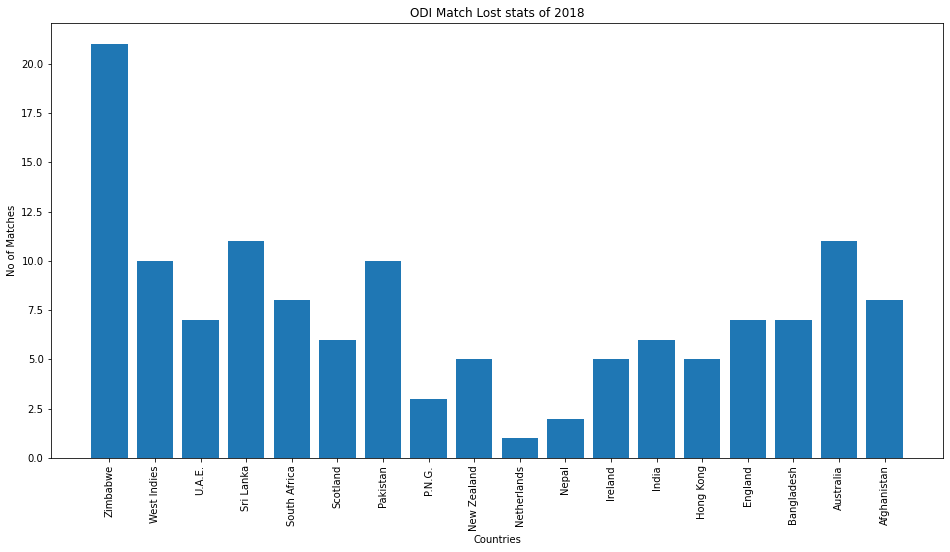

In [26]:
Matches_played = np.array(matches_played)
match_won = np.array(match_won)
matches_lost = matches_played-match_won
plt.figure(figsize=(16,8))
plt.bar(Countries, matches_lost, label='Matches Lost')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('No of Matches')
plt.title('ODI Match Lost stats of 2018')
plt.show()


**13. Divide the column ‘Margin’ into two different columns. One is for ‘By 
Runs’, and the other is for ‘By Wickets’**

In [28]:
df_2018['By Runs'] = np.where(df_2018['margin']=='runs', df_2018['Number'], np.nan)
df_2018['By Wickets'] = np.where(df_2018['margin']=='wickets', df_2018['Number'], np.nan)
df_2018.drop(columns=['Number', 'margin'], inplace=True)
df_2018

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,HostCountry,By Runs,By Wickets
Match Date,,,,,,,,,
2018-01-06,ODI # 3946,New Zealand,Pakistan,New Zealand,61 runs,Wellington,New Zealand,61.0,NaN
2018-01-09,ODI # 3947,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,New Zealand,NaN,8.0
2018-01-11,ODI # 3948,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,U.A.E.,NaN,4.0
2018-01-13,ODI # 3949,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,New Zealand,183.0,NaN
2018-01-13,ODI # 3950,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,U.A.E.,67.0,NaN
...,...,...,...,...,...,...,...,...,...
2018-11-11,ODI # 4069,Australia,South Africa,South Africa,40 runs,Hobart,Australia,40.0,NaN
2018-11-11,ODI # 4070,New Zealand,Pakistan,no result,NaN,Dubai (DSC),U.A.E.,NaN,NaN
2018-12-09,ODI # 4071,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,Bangladesh,NaN,5.0


**14. How many matches are ended up with “no result” in each month.**

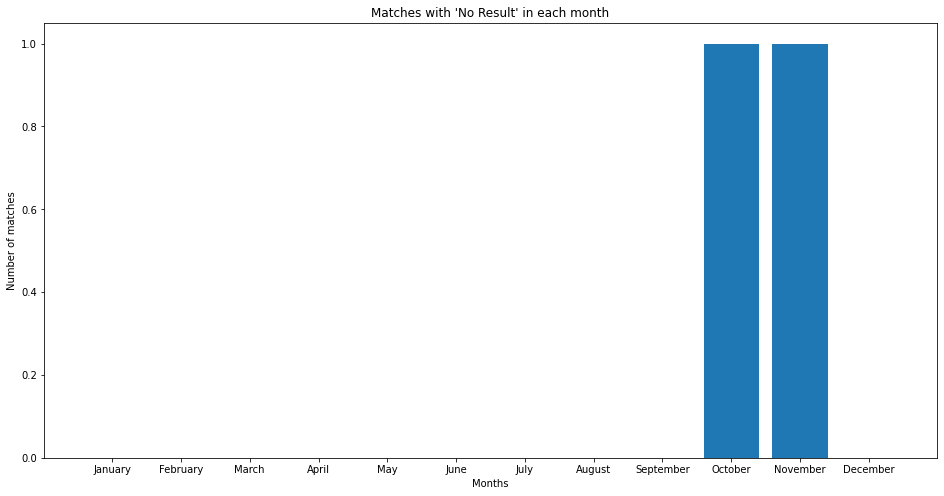

In [30]:
months = df_2018.index.month.unique()
no_result_matches = []
for month in range(1,13):
 df_new = df_2018.loc[f'{month}-2018']
 no_result_matches.append((df_new['Winner']=='no result').sum())
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
 
plt.figure(figsize=(16,8))
plt.bar(month, no_result_matches)
plt.xlabel('Months')
plt.ylabel('Number of matches')
plt.title('Matches with \'No Result\' in each month')
plt.show()